In [1]:
from torchvision import datasets
import torch
data_folder = "./data"
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 229kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.26MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]


In [2]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [3]:
import matplotlib.pyplot as plt
import numpy as np

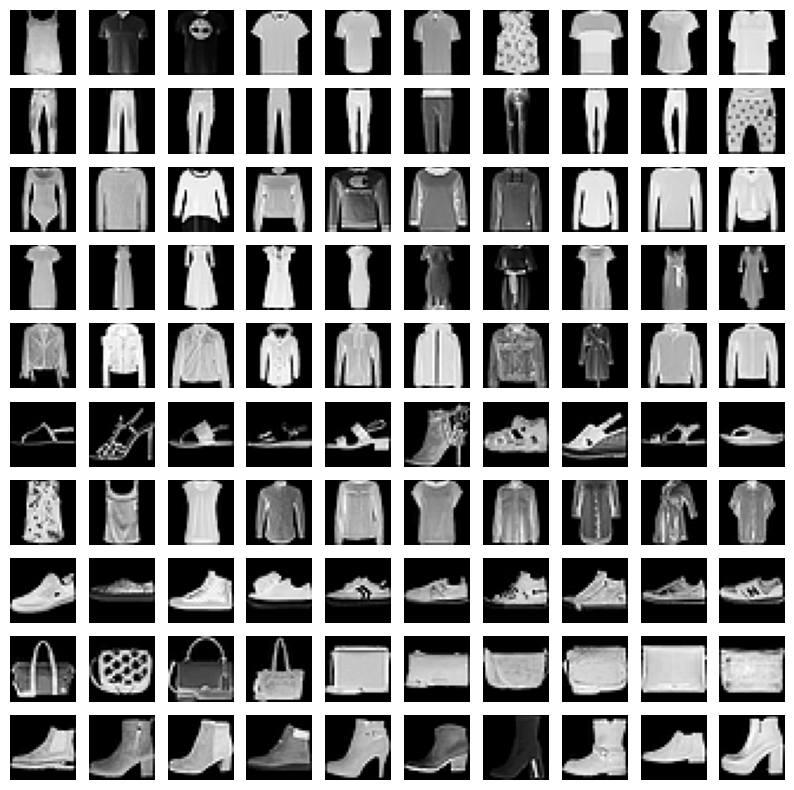

In [10]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for  label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
       plot_cell.grid(False)
       plot_cell.axis('off')
       ix = np.random.choice(label_x_rows)
       x, y = tr_images[ix], tr_targets[ix]
       plot_cell.imshow(x, cmap='gray')

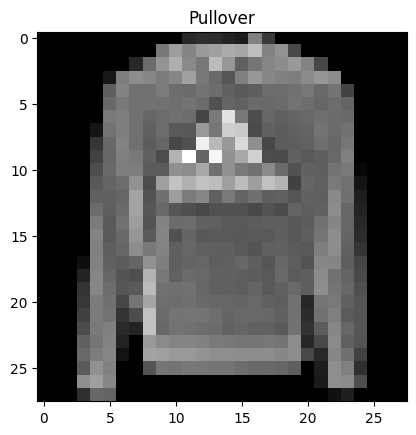

In [15]:
ix = 24150
plt.imshow(tr_images[ix],cmap='gray')
plt.title(fmnist.classes[tr_targets[ix]])
plt.show()

In [16]:
from torch import nn
from torch.utils.data import TensorDataset,DataLoader
from torch.optim import Adam
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train = torch.tensor([[
    [[1,2,3,4],
     [2,3,4,5],
     [5,6,7,8],
     [1,3,4,5]]
], [[
    [-1,2,3,-4],
    [ 2,-3,4, 5],
    [-5,6,-7,8],
    [-1,-3,-4,-5]]
]]).to(device).float()
x_train /= 8

y_train = torch.tensor([[0],
                        [1]]).to(device).float()


In [18]:
def get_model():
  model = nn.Sequential(
      nn.Conv2d(1,1,kernel_size=3),
      nn.MaxPool2d(2),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(1,1),
      nn.Sigmoid(),
  ).to(device)
  loss_fn = nn.BCELoss()
  optimizer = Adam(model.parameters(), lr=1e-2)
  return model,loss_fn,optimizer


In [20]:
from torchsummary import summary
model, loss_fn, optimizer = get_model()
print(summary(model, tuple(x_train.shape[1:])))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 1, 2, 2]              10
         MaxPool2d-2              [-1, 1, 1, 1]               0
              ReLU-3              [-1, 1, 1, 1]               0
           Flatten-4                    [-1, 1]               0
            Linear-5                    [-1, 1]               2
           Sigmoid-6                    [-1, 1]               0
Total params: 12
Trainable params: 12
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [21]:
#定义一个函数用来训练一个小批次的数据
def train_batch(x,y,model,optimizer,loss_fn):
  model.train()
  predition = model(x)
  batch_loss = loss_fn(prediction)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

In [ ]:
trn_dl = DataLoader(TensorDataset(x_train,y_train))
for epoch in range(2000):
  for ix,batch in enumerate(iter(trn_dl)):
    x,y = batch
    batch_loss = train_batch(x,y,model,optimizer,loss_fn)